In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading dataset to the environment

In [2]:
df = pd.read_excel(r'C:\Users\ASUS\OneDrive\Desktop\NIRANJANA\DSA course\iris (1).xls')

In [3]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Data pre-processing

In [4]:
df.shape

(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.describe(include = 'object')

,Classification
count,150
unique,3
top,Iris-setosa
freq,50


In [8]:
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [9]:
round(df.isna().sum()/len(df),2).sort_values(ascending = False)

SL                0.05
SW                0.04
PL                0.04
PW                0.00
Classification    0.00
dtype: float64

In [10]:
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [11]:
col = ['SL', 'SW', 'PL']

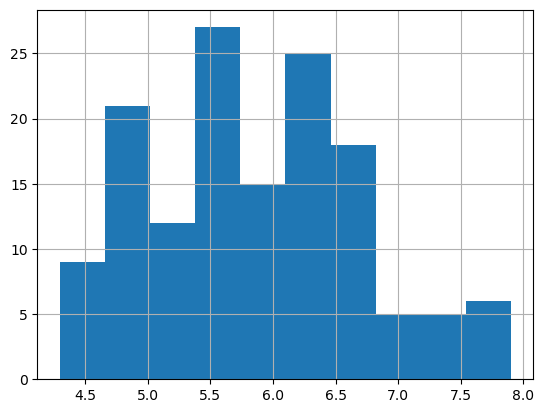

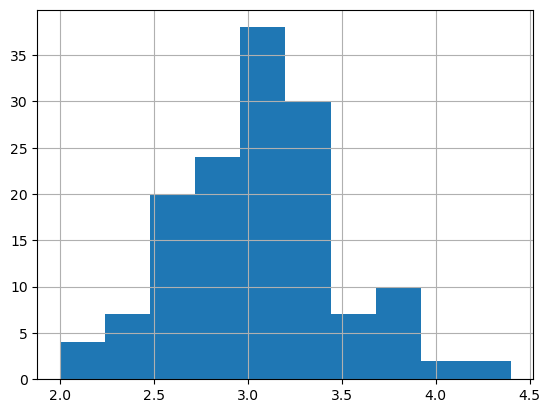

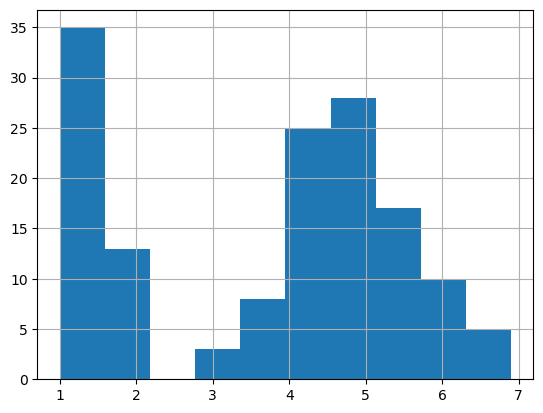

In [12]:
for i in col:
    df[i].hist()
    plt.show()

### Handling missing values

In [13]:
for i in ['SL',"SW"] :
    df[i] = df[i].fillna(df[i].mean())

In [14]:
df['PL'] = df['PL'].fillna(df[i].median())

In [15]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [16]:
df.PL.nunique()

43

In [17]:
df.Classification.nunique()

3

### Handling outliers

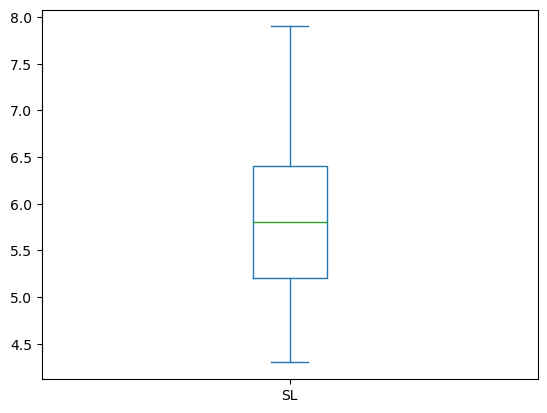

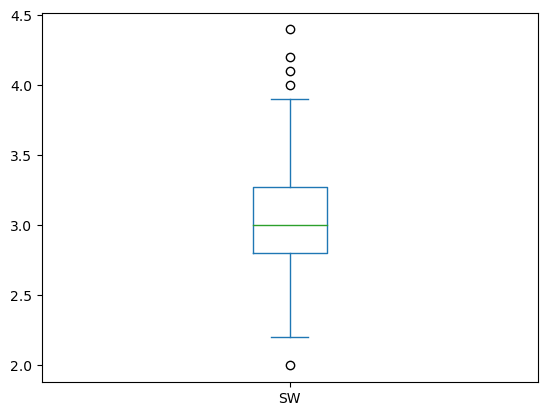

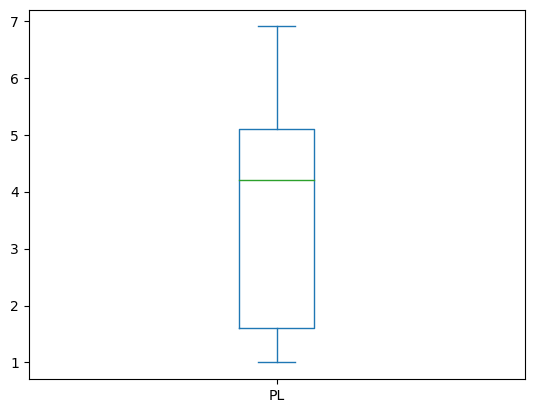

In [18]:
for i in col:
    df[i].plot.box()
    plt.show()

In [19]:
Q1 = np.percentile(df['SW'],25)

In [20]:
Q3 = np.percentile(df['SW'],75)

In [21]:
IQR = Q3-Q1

In [22]:
low_limit = Q1 - 1.5 * IQR
upr_limit = Q3 + 1.5 * IQR

In [23]:
low_limit

2.0874999999999995

In [24]:
upr_limit

3.9875

In [25]:
outlier = []
for x in df['SW']:
    if x>upr_limit or x<low_limit:
        outlier.append(x)

In [26]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [27]:
ind = df['SW']>upr_limit 
df.loc[ind].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [28]:
ind1 = df['SW']<low_limit
df.loc[ind1].index

Int64Index([60], dtype='int64')

In [29]:
df.drop([14, 15, 32, 33,60],inplace = True)

In [30]:
df.shape

(145, 5)

## Label Encoding

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Classification'] = le.fit_transform(df['Classification'])

In [32]:
df.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,0
1,4.900000,3.0,1.4,0.2,0
2,5.855944,3.2,1.3,0.2,0
3,4.600000,3.1,1.5,0.2,0
4,5.000000,3.6,1.4,0.2,0


In [33]:
df.Classification.unique()

array([0, 1, 2])

### Correlation

In [34]:
corr_matrix = df.corr()

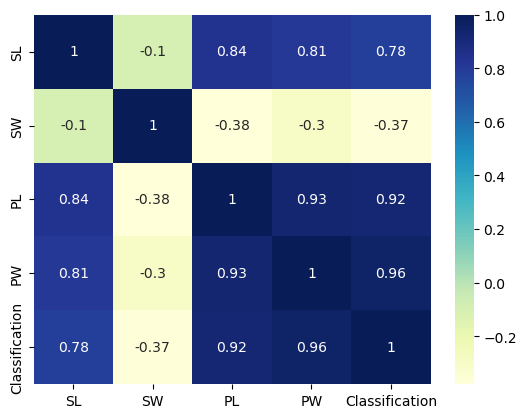

In [35]:
sns.heatmap(corr_matrix,annot = True, cmap = 'YlGnBu')
plt.show()

In [36]:
df = df.drop('PL',axis =1)

## Scaling

In [37]:
x = df.drop('Classification',axis =1)

In [38]:
y = df['Classification']

In [39]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
x = std_scaler.fit_transform(x)

In [40]:
x

array([[-0.94645043,  1.27193821, -1.35904738],
       [-1.19219013, -0.06832248, -1.35904738],
       [-0.0176231 ,  0.46778179, -1.35904738],
       [-1.56079968,  0.19972965, -1.35904738],
       [-1.06932028,  1.53999035, -1.35904738],
       [-0.57784088,  2.34414677, -1.09435716],
       [-1.56079968,  1.00388607, -1.22670227],
       [-1.06932028,  1.00388607, -1.35904738],
       [-1.80653938, -0.33637462, -1.35904738],
       [-1.19219013,  0.19972965, -1.49139249],
       [-0.57784088,  0.06384211, -1.35904738],
       [-1.31505998,  1.00388607, -1.35904738],
       [-1.31505998, -0.06832248, -1.49139249],
       [-1.92940923, -0.06832248, -1.49139249],
       [-0.57784088,  2.34414677, -1.09435716],
       [-0.94645043,  1.27193821, -1.22670227],
       [-0.20923133,  2.07609463, -1.22670227],
       [-0.94645043,  2.07609463, -1.22670227],
       [-0.57784088,  1.00388607, -1.35904738],
       [-0.0176231 ,  1.80804249, -1.09435716],
       [-1.56079968,  1.53999035, -1.359

In [41]:
x = pd.DataFrame(x)

# Classification Models

## Logistic Regression

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [43]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(x_train,y_train)

In [44]:
y_predict = model.predict(x_test)

In [45]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score

In [46]:
confusion_matrix(y_test,y_predict)

array([[ 9,  0,  0],
       [ 0,  9,  0],
       [ 0,  1, 10]], dtype=int64)

In [47]:
print('Accuracy =',accuracy_score(y_test,y_predict))
print('Precision =',precision_score(y_test,y_predict,average = None))
print('Recall =',recall_score(y_test,y_predict,average = None))
print('F1 Score =',f1_score(y_test,y_predict,average = None))

Accuracy = 0.9655172413793104
Precision = [1.  0.9 1. ]
Recall = [1.         1.         0.90909091]
F1 Score = [1.         0.94736842 0.95238095]


# KNN

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
metric_k = []
neighbors = np.arange(3,15)

In [50]:
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k,metric ='euclidean')
    classifier.fit(x_train,y_train)
    y_predictions = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_predictions)
    metric_k.append(acc)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

In [51]:
metric_k

[0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.896551724137931,
 0.896551724137931,
 0.896551724137931,
 0.9310344827586207,
 0.8620689655172413,
 0.896551724137931,
 0.896551724137931,
 0.896551724137931,
 0.9310344827586207]

Text(0, 0.5, 'Accuracy')

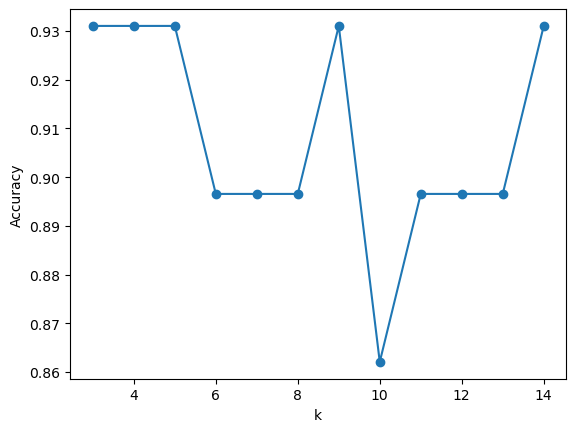

In [52]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k')
plt.ylabel('Accuracy')

In [53]:
classifier = KNeighborsClassifier(n_neighbors = 3,metric ='euclidean')
classifier.fit(x_train,y_train)
y_predictions = classifier.predict(x_test)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [54]:
print('Accuracy =',accuracy_score(y_test,y_predictions))
print('Precision =',precision_score(y_test,y_predictions,average = None))
print('Recall =',recall_score(y_test,y_predictions,average = None))
print('F1 Score =',f1_score(y_test,y_predictions,average = None))
confusion_matrix(y_test,y_predictions)

Accuracy = 0.9310344827586207
Precision = [1.         0.88888889 0.90909091]
Recall = [1.         0.88888889 0.90909091]
F1 Score = [1.         0.88888889 0.90909091]


array([[ 9,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 10]], dtype=int64)

In [55]:
classifier = KNeighborsClassifier(n_neighbors = 4,metric ='euclidean')
classifier.fit(x_train,y_train)
y_predictions = classifier.predict(x_test)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [56]:
print('Accuracy =',accuracy_score(y_test,y_predictions))
print('Precision =',precision_score(y_test,y_predictions,average = None))
print('Recall =',recall_score(y_test,y_predictions,average = None))
print('F1 Score =',f1_score(y_test,y_predictions,average = None))
confusion_matrix(y_test,y_predictions)

Accuracy = 0.9310344827586207
Precision = [1.         0.88888889 0.90909091]
Recall = [1.         0.88888889 0.90909091]
F1 Score = [1.         0.88888889 0.90909091]


array([[ 9,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 10]], dtype=int64)

In [57]:
classifier = KNeighborsClassifier(n_neighbors = 14,metric ='euclidean')
classifier.fit(x_train,y_train)
y_predictions = classifier.predict(x_test)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [58]:
print('Accuracy =',accuracy_score(y_test,y_predictions))
print('Precision =',precision_score(y_test,y_predictions,average = None))
print('Recall =',recall_score(y_test,y_predictions,average = None))
print('F1 Score =',f1_score(y_test,y_predictions,average = None))
confusion_matrix(y_test,y_predictions)

Accuracy = 0.9310344827586207
Precision = [1.         0.81818182 1.        ]
Recall = [1.         1.         0.81818182]
F1 Score = [1.  0.9 0.9]


array([[9, 0, 0],
       [0, 9, 0],
       [0, 2, 9]], dtype=int64)

# SVM

In [59]:
from sklearn.svm import SVC
svmclf = SVC(kernel = 'linear')
svmclf.fit(x_train,y_train)

SVC(kernel='linear')

In [60]:
y_pred = svmclf.predict(x_test)

In [61]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy is',accuracy_score(y_test,y_pred))
print('Precision =',precision_score(y_test,y_predictions,average = None))
print('Recall =',recall_score(y_test,y_predictions,average = None))
print('F1 Score =',f1_score(y_test,y_predictions,average = None))

Accuracy is 0.9655172413793104
Precision = [1.         0.81818182 1.        ]
Recall = [1.         1.         0.81818182]
F1 Score = [1.  0.9 0.9]


In [62]:
print(confusion_matrix(y_test,y_pred))

[[ 9  0  0]
 [ 0  9  0]
 [ 0  1 10]]


# Decision Tree

In [63]:
from sklearn.tree import DecisionTreeClassifier
dt_clf =DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [64]:
y_pred = dt_clf.predict(x_test)

In [65]:
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision =',precision_score(y_test,y_predictions,average = None))
print('Recall =',recall_score(y_test,y_predictions,average = None))
print('F1 Score =',f1_score(y_test,y_predictions,average = None))

Accuracy is: 0.9310344827586207
Precision = [1.         0.81818182 1.        ]
Recall = [1.         1.         0.81818182]
F1 Score = [1.  0.9 0.9]


In [66]:
print(confusion_matrix(y_test,y_pred))

[[9 0 0]
 [0 9 0]
 [0 2 9]]


# Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [68]:
y_pred = rf_clf.predict(x_test)

In [69]:
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision =',precision_score(y_test,y_predictions,average = None))
print('Recall =',recall_score(y_test,y_predictions,average = None))
print('F1 Score =',f1_score(y_test,y_predictions,average = None))

Accuracy is: 0.9310344827586207
Precision = [1.         0.81818182 1.        ]
Recall = [1.         1.         0.81818182]
F1 Score = [1.  0.9 0.9]


In [71]:
# Logistic regression and SVM models gives high accuracy values. SO they give the best result.